# Sprint 10: Contar una historia utilizando datos <a id='back'></a>

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#INTRODUCCIÓN-" data-toc-modified-id="INTRODUCCIÓN--1"><span class="toc-item-num">1&nbsp;&nbsp;</span>INTRODUCCIÓN <a id="intro"></a></a></span></li><li><span><a href="#PREPARAR-LOS-DATOS-" data-toc-modified-id="PREPARAR-LOS-DATOS--2"><span class="toc-item-num">2&nbsp;&nbsp;</span>PREPARAR LOS DATOS <a id="prep"></a></a></span></li><li><span><a href="#ANÁLISIS-DE-LOS-DATOS-" data-toc-modified-id="ANÁLISIS-DE-LOS-DATOS--3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ANÁLISIS DE LOS DATOS <a id="analysis"></a></a></span><ul class="toc-item"><li><span><a href="#Proporciones-de-los-tipos-de-establecimientos-" data-toc-modified-id="Proporciones-de-los-tipos-de-establecimientos--3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Proporciones de los tipos de establecimientos <a id="rest_proportions"></a></a></span></li><li><span><a href="#Proporciones-de-pertenencia-a-una-cadena-" data-toc-modified-id="Proporciones-de-pertenencia-a-una-cadena--3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Proporciones de pertenencia a una cadena <a id="chain_proportions"></a></a></span></li><li><span><a href="#¿Qué-tipo-de-establecimiento-es-habitualmente-una-cadena?-" data-toc-modified-id="¿Qué-tipo-de-establecimiento-es-habitualmente-una-cadena?--3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>¿Qué tipo de establecimiento es habitualmente una cadena? <a id="type_chains"></a></a></span></li><li><span><a href="#¿Qué-caracteriza-a-las-cadenas?-" data-toc-modified-id="¿Qué-caracteriza-a-las-cadenas?--3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>¿Qué caracteriza a las cadenas? <a id="chains_seats"></a></a></span></li><li><span><a href="#Promedio-de-número-de-asientos-" data-toc-modified-id="Promedio-de-número-de-asientos--3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Promedio de número de asientos <a id="type_seats_mean"></a></a></span></li><li><span><a href="#Calles-por-número-de-restaurantes-" data-toc-modified-id="Calles-por-número-de-restaurantes--3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Calles por número de restaurantes <a id="streets"></a></a></span></li><li><span><a href="#Número-de-calles-con-un-establecimiento-" data-toc-modified-id="Número-de-calles-con-un-establecimiento--3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Número de calles con un establecimiento <a id="streets_one_rest"></a></a></span></li><li><span><a href="#Distribución-del-número-de-asientos-por-calle-" data-toc-modified-id="Distribución-del-número-de-asientos-por-calle--3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Distribución del número de asientos por calle <a id="streets_seats"></a></a></span></li></ul></li><li><span><a href="#PRESENTACIÓN-" data-toc-modified-id="PRESENTACIÓN--4"><span class="toc-item-num">4&nbsp;&nbsp;</span>PRESENTACIÓN <a id="presentation"></a></a></span></li><li><span><a href="#CONCLUSIONES-GENERALES-" data-toc-modified-id="CONCLUSIONES-GENERALES--5"><span class="toc-item-num">5&nbsp;&nbsp;</span>CONCLUSIONES GENERALES <a id="end"></a></a></span></li></ul></div>

## INTRODUCCIÓN <a id='intro'></a>



Nuestro proyecto consiste, de manera general, en realizar un análisis visual sobre los datos obtenidos en varias cadenas de restaurantes dentro de un área específica (Los Ángeles), el análisis se realiza con el objetivo de análizar a la competencia para la instalación de un nuevo establecimiento en el área, con la intención de proporcionar recomendaciones sobre el tipo de restaurante y el número de asientos que se requieren para llamar la atención de las personas y, sobre todo, de inversionistas para poder llevar a cabo la creación y mantenimiento del lugar, junto con las posibilidades de desarrollar alguna cadena.

Usando las herramientas aprendidas, se realizará dentro de este proyecto una presentación de la investigación realizada para compartir con el grupo de inversionistas e intentar convencerlos de invertir en nuestra idea de negocio.


## PREPARAR LOS DATOS <a id='prep'></a>

Comenzaré este proyecto haciendo un análisis exploratorio de los datos usando el archivo proporcionado. Se analizará el archivo que contiene la información de los establecimientos en el área de Los Ángeles, para hacer el análisis de forma rápida y precisa, se hace una busqueda de posibles valores nulos, filas duplicadas. Los tipos de datos por columna se crearán al momento de la carga del dataset, en caso de que sea necesario cambiar el tipo de alguna columna.

A continuación, para tener una idea clara de los recursos con los que se trabaja, se describen los datos en el archivo que se utilizará a lo largo de este proyecto. El archivo se localiza con la ruta: `/datasets/rest_data_us_upd.csv`, contiene las siguientes columnas:

* object_name: Nombre del establecimiento.
* chain: Si el establecimiento que pertenece a una cadena tendrá el valor TRUE, en caso contrario será FALSE.
* object_type: Tipo de establecimiento.
* address: Dirección del establecimiento.
* number: Número de asientos.

In [1]:
# Importar librerias
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import re

import math as mth
import numpy as np
from scipy import stats as sts

In [2]:
# Cargar el archivo
data = pd.read_csv("datasets/rest_data_us_upd.csv", dtype={'chain': 'boolean'} )
data.rename(columns={'number':'seats'}, inplace=True)

In [3]:
# Observar los dataframes, tipos de datos, elementos nulos y duplicados
# Hipótesis
print(data.describe())
print()
print(data.info())
print()
print("Duplicados: ", data.duplicated().sum())

                 id        seats
count   9651.000000  9651.000000
mean   16611.000000    43.695161
std     2786.148058    47.622874
min    11786.000000     1.000000
25%    14198.500000    14.000000
50%    16611.000000    27.000000
75%    19023.500000    46.000000
max    21436.000000   229.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           9651 non-null   int64  
 1   object_name  9651 non-null   object 
 2   address      9651 non-null   object 
 3   chain        9648 non-null   boolean
 4   object_type  9651 non-null   object 
 5   seats        9651 non-null   int64  
dtypes: boolean(1), int64(2), object(3)
memory usage: 396.0+ KB
None

Duplicados:  0


In [4]:
# Observar y eliminar datos con valores nulos
display(data[data['chain'].isna()])
data.fillna(False, inplace=True)
print(data.info())

,id,object_name,address,chain,object_type,seats
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,<NA>,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,<NA>,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,<NA>,Restaurant,35


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           9651 non-null   int64  
 1   object_name  9651 non-null   object 
 2   address      9651 non-null   object 
 3   chain        9651 non-null   boolean
 4   object_type  9651 non-null   object 
 5   seats        9651 non-null   int64  
dtypes: boolean(1), int64(2), object(3)
memory usage: 396.0+ KB
None


**CONCLUSIONES**

Al cargar el archivo de datos, he cambiado el tipo de dato de la columna 'chain' a un tipo booleano, de esta forma pienso que se podrá manejar con mayor facilidad, también he cambiado el nombre de la columna `number` a `seats` para que sea más fácil de saber a qué hace referencia el valor en la columna.

Se pudieron observar valores nulos en la columna 'chain', esta columna indica si el establecimiento cuenta o no con alguna sucursal, en este caso ninguno de los pocos valores observados contaba con una cadena, entonces se ha decididio simplemente rellenar la columna con el valor False. También se pudo observar que en estos establecimientos existe un lugar con el valor de 1 asiento, lo cuál no sabemos si esté correcto o sea un error en el registro, lo dejaremos dentro de los datos, pero es algo que ya se observó e igualmente puede haber más valores similares.

[Volver a Contenidos](#back)

## ANÁLISIS DE LOS DATOS <a id='analysis'></a>

Ahora se llevará a cabo el análisis correspondiente de los datos, al finalizar la sección se podran realizar las observaciones y proporcionar las recomendaciones sobre el tipo de restaurante que conviene elegir y el número de asientos que se deberían usar en el establecimiento.

En las siguientes secciones se irán planteando las respuestas con sus procedimientos y mostrando las gráficas necesarias para llegar a las conclusiones que serán presentadas en una presentación.

### Proporciones de los tipos de establecimientos <a id='rest_proportions'></a>

Para comenzar la investigación, se realizará una observación sobre las proporciones de los distintos tipos de establecimientos en el área, para resolverlo se obtiene elnúmero total de establecimientos de cada tipo y se divide entre el número total de establecimientos en la zona. Para observar mejor las proporciones se trazará un gráfico de barras, que nos indicará cuáles son los establecimientos con mayor proporcion de presencia.

In [5]:
# Buscar la proporción respecto a la cantidad total de establecimientos
prop_1 = data.groupby('object_type', as_index=False).count()
prop_1['rest_proportion'] = prop_1['id'] / prop_1['id'].sum()
display(prop_1)

,object_type,id,object_name,address,chain,seats,rest_proportion
0,Bakery,283,283,283,283,283,0.029323
1,Bar,292,292,292,292,292,0.030256
2,Cafe,435,435,435,435,435,0.045073
3,Fast Food,1066,1066,1066,1066,1066,0.110455
4,Pizza,320,320,320,320,320,0.033157
5,Restaurant,7255,7255,7255,7255,7255,0.751736


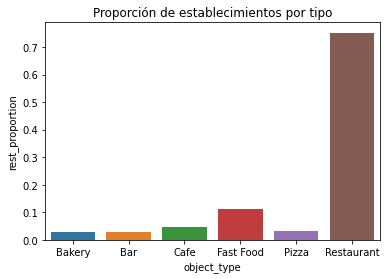

In [6]:
# Grafico de proporción
sns.barplot(x='object_type', y='rest_proportion', data=prop_1)
# fig = go.Figure(data=[go.Pie(labels=prop_1['object_type'], values=prop_1['rest_proportion'])])
plt.title('Proporción de establecimientos por tipo')
plt.show()

**CONCLUSIÓN**

Del grafico y de los datos, se puede observar que el tipo de establecimiento que predomina el área es el de 'Restaurant', seguido por los lugares de comida rápida 'Fast_Food' y los 'Cafe' en tercer lugar. Con esto en cuenta, podemos ver que un restaurante puede ser más frecuentado por las personas, al mismo tiempo que habrá una mayor cantidad de competidores. Quizás instalar un café en el área tenga menos competencia, pero requerirá más análisis para saber qué tan conveniente es crear el establecimiento.

[Volver a Contenidos](#back)

### Proporciones de pertenencia a una cadena <a id='chain_proportions'></a>

Ya conocemos la proporción de los tipos de establecimientos en el área, así que ahora se realizará una observación para conocer qué proporción de los establecimientos corresponden a una cadena y cuáles de ellos no. Para obtener los resultados, se realiza una agrupación por el tipo de establecimiento y si pertenecen a una cadena o no, después se divide el número de establecimientos  pertenecientes a estas divisiones entre el número total de establecimientos en el área. Para mostrar los resultados obtenidos, se usa un gráfico de barras con los tipos de establecimientos y dividiendo por colores a la proporción de los que pertenecen a una cadena y los que no.

Esto nos ayudará a observar cuántos de los establecimientos de cada tipo están representando a una cadena que posiblemente haya tenido un gran éxito en el pasado y debamos concentrarnos en superar a competencias menores en un primer acercamiento.

In [7]:
# Buscar la proporción respecto a la cantidad total de establecimientos
prop_2 = data.groupby(['chain', 'object_type'], as_index=False).count()
prop_2['chain_general_proportion'] = prop_2['id'] / prop_2['id'].sum()
display(prop_2)

,chain,object_type,id,object_name,address,seats,chain_general_proportion
0,False,Bar,215,215,215,215,0.022277
1,False,Cafe,169,169,169,169,0.017511
2,False,Fast Food,461,461,461,461,0.047767
3,False,Pizza,167,167,167,167,0.017304
4,False,Restaurant,4963,4963,4963,4963,0.514247
5,True,Bakery,283,283,283,283,0.029323
6,True,Bar,77,77,77,77,0.007978
7,True,Cafe,266,266,266,266,0.027562
8,True,Fast Food,605,605,605,605,0.062688
9,True,Pizza,153,153,153,153,0.015853


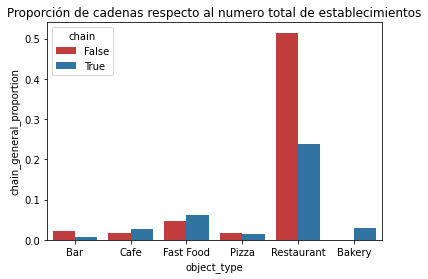

In [8]:
# Grafico de proporción respecto al número total de establecimientos
sns.barplot(x='object_type', y='chain_general_proportion', data=prop_2, hue='chain', palette=['tab:red', 'tab:blue'])
plt.title('Proporción de cadenas respecto al numero total de establecimientos')
plt.show()

**CONCLUSIÓN**

Se observa gráficamente que la proporción de establecimientos que pertenecen a una cadena es menor en establecimientos de tipo restaurant, pizza y bar, para el resto existe una mayor cantidad de establecimientos con cadenas. Algo que se puede apreciar es que todos los establecimientos del tipo 'Bakery' pertenecen a alguna cadena.


[Volver a Contenidos](#back)

### ¿Qué tipo de establecimiento es habitualmente una cadena? <a id='type_chains'></a>

Tras haber realizado un análisis sobre los datos, se puede apreciar que la mayoría de establecimientos son restaurantes. Ahora realizaremos una observación para saber cuál es la cantidad de cada tipo de establecimiento respecto a si estos pertenecen a una cadena o no.

,chain,object_type,id_x,object_name,address,seats,chain_general_proportion,id_y
0,False,Bar,215,215,215,215,0.022277,292
1,True,Bar,77,77,77,77,0.007978,292
2,False,Cafe,169,169,169,169,0.017511,435
3,True,Cafe,266,266,266,266,0.027562,435
4,False,Fast Food,461,461,461,461,0.047767,1066
5,True,Fast Food,605,605,605,605,0.062688,1066
6,False,Pizza,167,167,167,167,0.017304,320
7,True,Pizza,153,153,153,153,0.015853,320
8,False,Restaurant,4963,4963,4963,4963,0.514247,7255
9,True,Restaurant,2292,2292,2292,2292,0.237488,7255


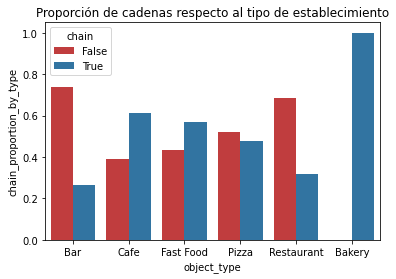

In [9]:
# Unir la cantidad de establecimientos por cadenas y cantidad por tipo
prop_3 = prop_2.merge(prop_1[['object_type', 'id']], on='object_type')
display(prop_3)

# Esta proporción es respecto a los tipos de establecimientos con cadenas
prop_3['chain_proportion_by_type'] = prop_3['id_x'] / prop_3['id_y']
sns.barplot(x='object_type', y='chain_proportion_by_type', data=prop_3, hue='chain', palette=['tab:red', 'tab:blue'])
plt.title('Proporción de cadenas respecto al tipo de establecimiento')
plt.show()

**CONCLUSIÓN**

Al igual que en el gráfico de proporciones respecto al total de establecimientos, se observa que los establecimientos que tienen mayor cantidad de cadenas son los de tipo 'Fast_Food' y 'Cafe', mientras que los estableceimientos de tipo 'Bakery' son siempre cadenas, al menos en el área registrada. Con esta información, sabemos que colocar una cadena del esstablecimiento de tipo 'Cafe' puede ayudar a generar más ingresos en el área, pero se debe observar más información sobre los establecimientos para poder atraer más clientes y poder competir con el resto de establecimientos.

[Volver a Contenidos](#back)

### ¿Qué caracteriza a las cadenas? <a id='chains_seats'></a>

Con los análisis previos, ha surguido una pregunta que queremos responder: ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos? Para resolver esta pregunta se filtran únicamente los establecimientos con cadenas, se observará la cantidad de asientos que los establecimientos suelen tener, con respecto a la cantidad de cadenas. Usaré un gráfico de distribución conjunta para observar con mayor exactitud el número de establecimientos con cadenas y el número promedio de asientos en cada uno.

In [10]:
# Promedio de asientos respecto a la cantidad total de establecimientos de las cadenas
prop_3 = data[data['chain']==True].groupby('object_name', as_index=False).agg({'chain':'sum', 'seats':'mean'})
display(prop_3.sort_values(by='chain',ascending=False))
#display(data[data['object_name']=="MCDONALD'S"].sort_values(by='seats'))

,object_name,chain,seats
2459,THE COFFEE BEAN & TEA LEAF,47,26.723404
2226,SUBWAY,31,16.419355
519,DOMINO'S PIZZA,15,12.333333
2608,WABA GRILL,14,42.857143
1089,KENTUCKY FRIED CHICKEN,14,33.357143
...,...,...,...
1009,JAMBA JUICE #425,1,29.000000
1011,JAMBA JUICE #644,1,12.000000
1012,JAMBA JUICE #661,1,23.000000
1014,JAMBA JUICE #919,1,12.000000


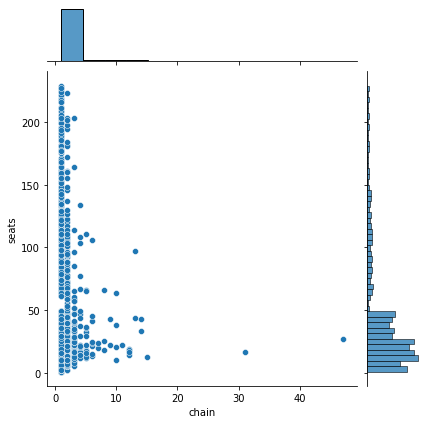

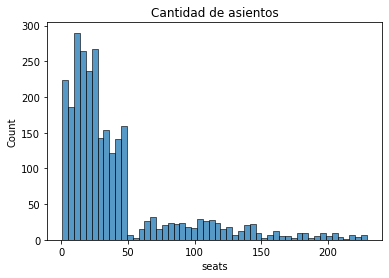

In [11]:
# Cantidad de cadenas por establecimiento y sus números de asiento
sns.jointplot(x='chain', y='seats', data=prop_3)
#plt.title('Cantidad de cadenas por establecimiento y sus números de asiento')
plt.show()

sns.histplot(x='seats', data=prop_3)
plt.title('Cantidad de asientos')
plt.show()

**CONCLUSIÓN**

Al mostrar los datos se pueden hacer las siguientes observaciones, en promedio, los establecimientos con mayor numero de cadenas, tienen menor cantidad de asientos, mientras que los establecimientos con una baja cantidad de cadenas, suelen tener un mayor número de asientos. También observamos que muchos de los establecimientos tienen cerca de un establecimiento por cadena, pero con una variedad en cuanto a la cantidad de asientos en promedio, la cuál va desde 1 asiento por 1 establecimiento, hasta 200 asientos en un solo establecimiento. Esto nos puede hacer pensar que existen establecimientos que forman parte de cadenas fuera de la zona que se está investigando y probablemente cuentan con una zona física con mayor capacidad para asientos.

[Volver a Contenidos](#back)

### Promedio de número de asientos <a id='type_seats_mean'></a>

Determinar el promedio del número de asientos para cada tipo de establecimiento para responder la siguiente pregunta: ¿Qué tipo de establecimiento tiene el mayor número de asientos? Para ello ralizaré una agrupación usando los tipos y usando la función promedio se podrá obtener el número de asientos en promedio para cada tipo de establecimiento. Con esto podremos observar si el tipo de establecimiento que queremos crear requiere una gran cantidad de asientos respecto al resto de establecimientos.

In [12]:
# Promedio de asientos respecto al tipo de establecimiento
prop_4 = data.groupby('object_type', as_index=False).agg({'seats':'mean'})
display(prop_4)

,object_type,seats
0,Bakery,21.773852
1,Bar,44.767123
2,Cafe,25.000000
3,Fast Food,31.837711
4,Pizza,28.459375
5,Restaurant,48.042316


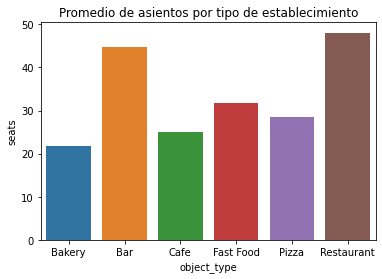

In [13]:
sns.barplot(x='object_type', y='seats', data=prop_4)
plt.title('Promedio de asientos por tipo de establecimiento')
plt.show()

**CONCLUSIÓN**

Al ser mayor la cantidad de establecimientos de tipo 'Restaurant' se esperaba que el promedio de asientos fuera el mayor, sin embargo, surgue la observación que los establecimientos de tipo 'Bar' el segundo lugar de mayor cantidad de asientos promedio, si se tiene en cuenta la cantidad de establecimientos que hay de este tipo, podemos pensar que tienen un gran promedio de asientos por establecimiento.

Enfocando los establecimientos del tipo 'Cafe', se puede observar que en promedio tienen 25 asientos por establecimiento, de esto se puede pensar que es muy probable que estos establecimientos no sean muy frecuentados por muchas personas al mismo tiempo, pero será un pequeño ahorro por el espacio y cantidad de asientos necesarios.

[Volver a Contenidos](#back)

### Calles por número de restaurantes <a id='streets'></a>

La tarea de esta sección es trazar un gráfico con las 10 mejores calles, ordenadas por el número de establecimientos en ellas. Para realizar este cálculo, primero se pide que se agreguen los datos de los nombres de las calles de la columna 'address' en una columna separada. Posterior a esto, podremos agrupar los datos usando las calles y hacer el conteo de establecimientos en cada una. Este análisis nos ayudará a observar en cuál de las calles en la zona es conveniente poner el establecimiento que deseamos crear.

In [14]:
#Copia para modificar y agregar columna extra, servirá para los análisis posteriores
df = data

# Definir una función para extraer las calles
def extraer_calle(direccion):
    # Utilizar expresiones regulares para encontrar el nombre de las calles
    pal = re.sub('^[\d]+', '', direccion) # Eliminar números al inicio
    pal = re.sub('\b[A-z]\s', '', pal.strip()) # Eliminar letras solas al inicio
    pal = re.sub('#\w+$', '', pal.strip()) # Eliminar caracteres especiales al final
    pal = re.sub('\d\/\d\s', '', pal.strip()) # Eliminar números con barras
    pal = re.sub('\d\/\d\s', '', pal.strip()) # Eliminar números con barras
    pal = re.sub('^[A-z]\s|\b[A-z]\s', '', pal.strip()) #Eliminar letras solas
    
    pal = re.sub('STA MON', 'SANTA MONICA', pal.strip()) #Cambiar palabras diferentes encontradas
    pal = re.sub('AVENUE OF THE STARS', 'AVE OF STARS', pal.strip())
    pal = re.sub('AVENUE', '', pal.strip()) #Eliminar repeticiones al inicio de AVENUE
    
    # Eliminar Prefijios de las palabras
    pal = re.sub('(^EL\s)|(^LA\s)|(^LAS\s)|(^LOS\s)|(^MC\s)|(^NEW\s)|(^PASEO\s)|(^SA\s)|(^SAN\s)|(^SANTA\s)|(^ST\s)|(^ST.\s)', '', pal.strip())
    return pal.strip().upper().split()[0]

# Aplicar la función a la columna
df['street'] = df['address'].apply(lambda x: ' '.join(x.split()[1:])) #df['address'].apply(extraer_calle)

# Filtrar filas donde se encontró una calle
df_filtrado = df.groupby('street', as_index=False).count().sort_values(by='object_name', ascending=False).reset_index(drop=True)

display(df_filtrado.head(10))
#display(df[df['street']=='MONICA']) #Para obtener las calles completas observar la columna address

,street,id,object_name,address,chain,object_type,seats
0,W SUNSET BLVD,296,296,296,296,296,296
1,W PICO BLVD,288,288,288,288,288,288
2,HOLLYWOOD BLVD,167,167,167,167,167,167
3,WILSHIRE BLVD,161,161,161,161,161,161
4,S VERMONT AVE,148,148,148,148,148,148
5,SANTA MONICA BLVD,146,146,146,146,146,146
6,W 3RD ST,145,145,145,145,145,145
7,BEVERLY BLVD,135,135,135,135,135,135
8,S FIGUEROA ST,134,134,134,134,134,134
9,MELROSE AVE,128,128,128,128,128,128


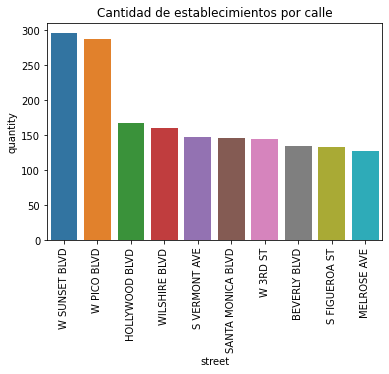

In [15]:
sns.barplot(x='street', y='id', data=df_filtrado.head(10))
plt.title('Cantidad de establecimientos por calle')
plt.ylabel('quantity')
plt.xticks(rotation=90)
plt.show()

**CONCLUSIÓN**

He realizado las operaciones que creí más convenientes para obtener el nombre único de cada calle y poder tener datos más precisos.

De los procedimientos encontré que la calle 'W SUNSET BLVD' es la calle con mayor número de establecimientos, seguida muy de cerca por la calle 'W PICO BLVD' con una diferencia leve, después de esas calles se encuentran otras que parecen tener muy leves diferencias en la cantidad entre ellas, como las calles 'S VERMONT AVE', 'SANTA MONICA BLVD' o 'W 3RD ST'.

De las mejores calles con mayor cantidad de establecimientos, se observa que la que menos tiene es la calle 'MELROSE AVE' podemos pensar que en esta calle se puede hallar un menor número de competencia para nuestro negocio, y al mismo tiempo ser atractivo para las personas, así que igualmente puede estar como consideración a elegirla.

[Volver a Contenidos](#back)

### Número de calles con un establecimiento <a id='streets_one_rest'></a>

La tarea es contar el número de calles que cuentan únicamente con un establecimiento. Este análisis nos puede ayudar a observar cuántas calles tenemos en los datos que sólo cuentan con un establecimiento, con esto tenemos una idea de la proporción de calles en las que quizás existan menos competidores, pero puede que al mismo tiempo existan menos probabilidades de generar mayores ingresos.

In [16]:
print('Cantidad total de calles con un solo establecimiento:', df_filtrado[df_filtrado['id']==1].shape[0])
print('Cantidad total de calles:', df_filtrado.shape[0])
print('Proporción de calles con un solo establecimiento:', df_filtrado[df_filtrado['id']==1].shape[0] / df_filtrado.shape[0])
display(df_filtrado[df_filtrado['id']==1])

Cantidad total de calles con un solo establecimiento: 2445
Cantidad total de calles: 3074
Proporción de calles con un solo establecimiento: 0.7953806115810019


,street,id,object_name,address,chain,object_type,seats
629,W 2ND ST #105 -106,1,1,1,1,1,1
630,S WESTERN AVE E,1,1,1,1,1,1
631,S WESTERN AVE FC3,1,1,1,1,1,1
632,S WESTERN AVE STE #127,1,1,1,1,1,1
633,VINE,1,1,1,1,1,1
...,...,...,...,...,...,...,...
3069,S BERENDO ST,1,1,1,1,1,1
3070,S BEVERWIL DR,1,1,1,1,1,1
3071,S BOYLE AVE,1,1,1,1,1,1
3072,S BOYLSTON ST,1,1,1,1,1,1


**CONCLUSIÓN**

Se observa que la cantidad total de calles registradas con un solo establecimiento es de 2445, en proporción con el total de calles registradas que es de 3074, se tiene que la proporción es de 79.54%, lo cuál es una proporción considerablemente alta, la mayor parte de las calles cuentan con un solo establecimiento. Esto me permite pensar que quizas estas sean calles pequeñas o muy alejadas de los lugares más frecuentados de la ciudad, o incluso existe la posibilidad de que el resto de calles con más establecimentos se concentran cerca de una zona específica de la ciudad.

[Volver a Contenidos](#back)

### Distribución del número de asientos por calle <a id='streets_seats'></a>

Para las calles que cuentan con muchos restaurantes, se pide analizar la distribución del número de asientos y observar las tendencias. Esta tarea la llevaré a cabo utilizando dos visualizaciones, la primera será sobre el número promedio de asientos en los establecimientos de las calles con mayor número de establecimientos; la segunda visualización se realizará sobre el numero total de asientos en cada establecimiento, usando solamente los datos de las mejores calles.

Considero que la primera forma de visualizar los datos puede ayudarnos a entender la cantidad de asientos que suelen colocar los establecimientos de acuerdo a la calle en la que se encuentran, mientras que la segunda forma de visualización puede ayudarnos a observar el rango en el número de asientos de los establecimientos que se encuentran en esas calles.

,street,id,seats
0,W SUNSET BLVD,296,50.918919
1,W PICO BLVD,288,40.878472
2,HOLLYWOOD BLVD,167,53.730539
3,WILSHIRE BLVD,161,62.130435
4,S VERMONT AVE,148,45.878378
5,SANTA MONICA BLVD,146,32.390411
6,W 3RD ST,145,43.931034
7,BEVERLY BLVD,135,44.770370
8,S FIGUEROA ST,134,50.761194
9,MELROSE AVE,128,52.429688


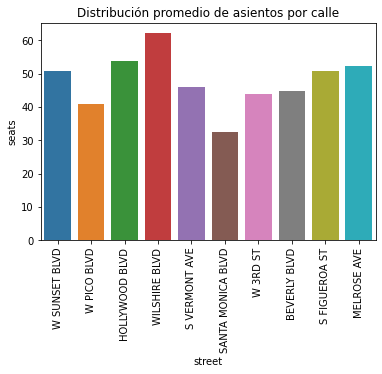

In [17]:
# Distribución del número PROMEDIO de asientos para las calles con mayor número de establecimientos
df_asientos = df.groupby('street', as_index=False).agg({'id':'count', 'seats':'mean'}).sort_values(by='id', ascending=False).reset_index(drop=True)

display(df_asientos.head(10))

sns.barplot(x='street', y='seats', data=df_asientos.head(10))
plt.title('Distribución promedio de asientos por calle')
plt.xticks(rotation=90)
plt.show()

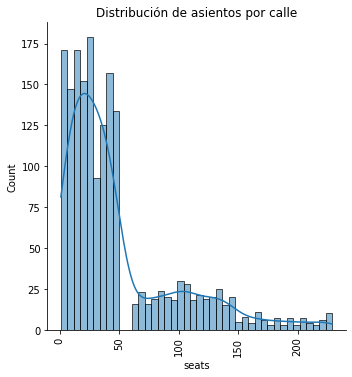

In [18]:
# Distribución total de los asientos para las calles con mayor cantidad de establecimientos
street_list = []
for street in df_filtrado['street'].head(10): street_list.append(street)

dist = df[df['street'].isin(street_list)] # Distribución general de número de asientos para las 10 mejores calles
#display(dist)

sns.displot(x='seats', data=dist, kde=True)
plt.title('Distribución de asientos por calle')
plt.xticks(rotation=90)
plt.show()

**CONCLUSIÓN**

Habiendo realizado las visualizaciones, podemos observar que el promedio de asientos por calle es mucho mayor en la calle con menos establecimientos 'WILSHIRE BLVD', esto me permite pensar que los establecimientos en esta calle esperan recibir a una mayor cantidad de personas o simplemente tienen mayor espacio en esa calle. En cuanto a la distribución general, observamos que en estas calles existe mayor cantidad de establecimientos con menos de 50 asientos.

Usando ambas distribuciones y juntando con el previo análisis de las calles con mayor número de establecimientos, puedo sugerir las calles 'W 3RD ST', 'BEVERLY BLVD' o 'SANTA MONICA BLVD' como opciones potenciales, estas calles presentan un balance entre el número de asientos y la cantidad de competencia en la misma calle, de esta forma se usa una localización frecuentada y al mismo tiempo se requiere menor cantidad de inversión en el número de asientos.

[Volver a Contenidos](#back)

## PRESENTACIÓN <a id='presentation'></a>

Se realizará una presentación para ser presentada al grupo de inversionistas del negocio que queremos crear. En la presentación se encuentran explicaciones sobre los resultados mostrados en este proyecto. La presentación se encuentra en  formato pdf a través del siguiente Link: 

https://drive.google.com/file/d/1j4D0D1CI4c6Tu3MNmX9TssVeQyR3a5Mj/view?usp=sharing

[Volver a Contenidos](#back)

## CONCLUSIONES GENERALES <a id='end'></a>

Llega a una conclusión y aporta recomendaciones sobre el tipo de restaurante y el número de asientos. Comenta la posibilidad de desarrollar una cadena.

Esperando que los análisis solicitados se hayan realizado de la forma correcta, puedo concluir que realizar un establecimiento de tipo 'Cafe' como se tenía planeado, puede ser una buena idea, ya que no existen muchos de este tipo en proporción al resto de establecimientos, al mismo tiempo se puede llegar a considerar una cadena si el negocio resulta exitoso ya que existen varios establecimientos del mismo tipo que tienen cadenas. En cuanto a lo que pudimos observar respecto a las cadenas, la mayoría de las cadenas presentan menor cantidad de asientos y menor cantidad en cuanto al tipo de establecimiento que planeamos crear.

Gracias a los resultados observados en la investigación de las calles, se puede buscar una calle con menor competencia y que a su vez permita tener el espacio suficiente para almacenar a un número considerable de clientes, las calles que he sugerido me parecen ser las que mejor adaptan el promedio en el número de asientos con el número de competidores, pues dado que es un negocio emergente, será bueno no tene altas expectativas.



[Volver a Contenidos](#back)